In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import itertools
import community as community_louvain
import matplotlib.cm as cm
import torch
import warnings
warnings.filterwarnings('ignore')

### IMDB

In [2]:
path = 'syn_vae/imdb/'

In [3]:
def plot_graph(G):

    color_class_map = {0: 'blue', 1: 'red', 2: 'darkgreen'}
            
    nx.draw(G, 
        with_labels=False, node_color=[color_class_map[node[1]['class']] 
                        for node in G.nodes(data=True)], 
            node_size=200,
        font_color='white')
    plt.show() 

In [4]:
def plot_partition(G,partition):
    # draw the graph
    pos = nx.spring_layout(G)
    # color the nodes according to their partition
    cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
    nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=100,label=True,
                            cmap=cmap, node_color=list(partition.values()))
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.show()

In [5]:
def detect_community(G):
    partition = community_louvain.best_partition(G)
    plot_partition(G,partition)

Graph of 5 nodes

In [6]:
G5 = nx.read_gexf(path + 'sync6815233225_G5.gexf')
node_class_syn = torch.load(path + 'sync6815233225_node_class5.pt').detach().numpy()
node_class_syn

array([2, 1, 1, 1, 2])

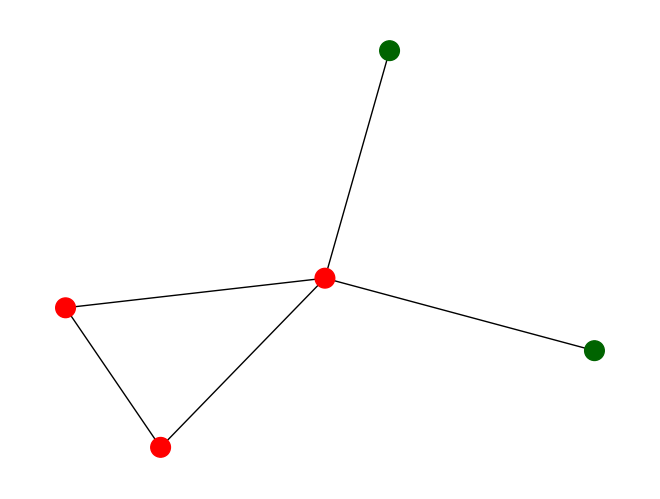

In [7]:
nx.set_node_attributes(G5, dict(zip(G5.nodes(), node_class_syn)), 'class')
plot_graph(G5)

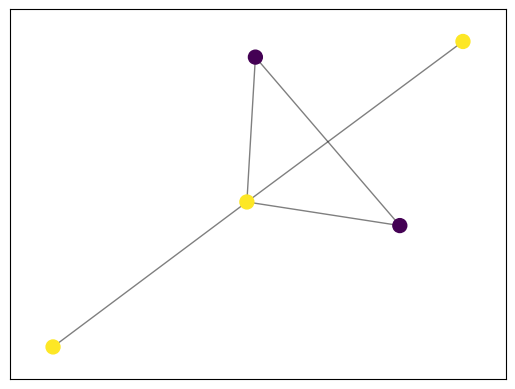

[{'0', '2', '4'}, {'1', '3'}]

In [8]:
detect_community(G5)
list_com= nx.community.louvain_communities(G5, seed=123)
list_com

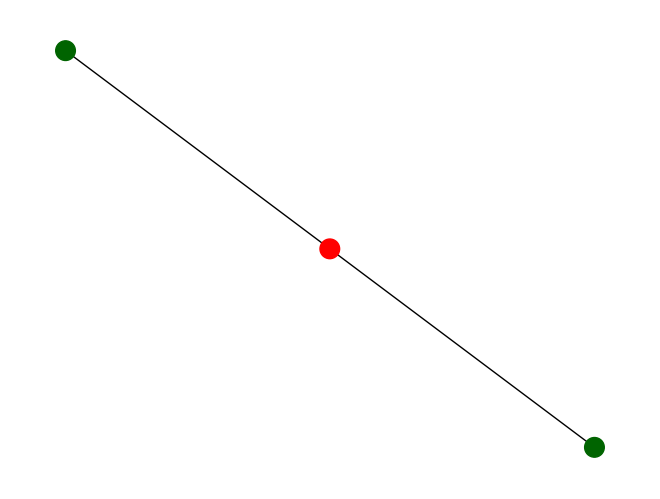

In [9]:
#Largest substructure
H = G5.subgraph(max(list_com, key=len))
plot_graph(H)

Graph of 10 nodes

In [10]:
G10 = nx.read_gexf(path + 'sync3403233339_G10.gexf')
node_class_syn = torch.load(path + 'sync3403233339_node_class10.pt').detach().numpy()
node_class_syn

array([0, 2, 0, 0, 0, 1, 1, 1, 2, 1])

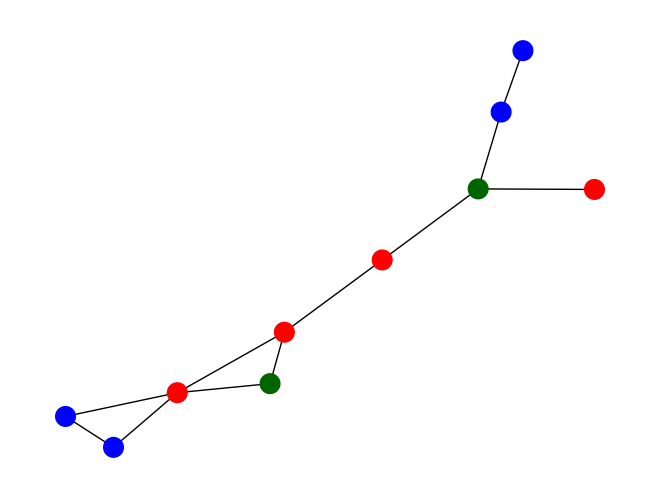

In [11]:
nx.set_node_attributes(G10, dict(zip(G10.nodes(), node_class_syn)), 'class')
plot_graph(G10)

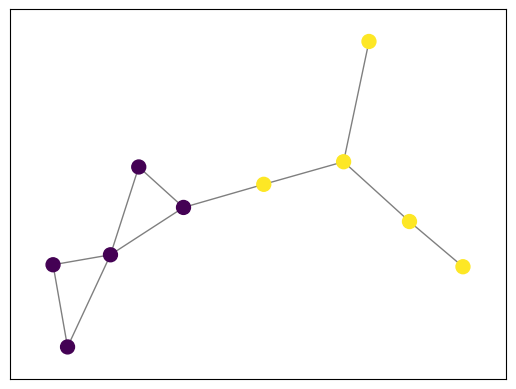

[{'0', '2', '5', '7', '9'}, {'1', '3', '4', '6', '8'}]

In [12]:
detect_community(G10)
list_com= nx.community.louvain_communities(G10, seed=123)
list_com

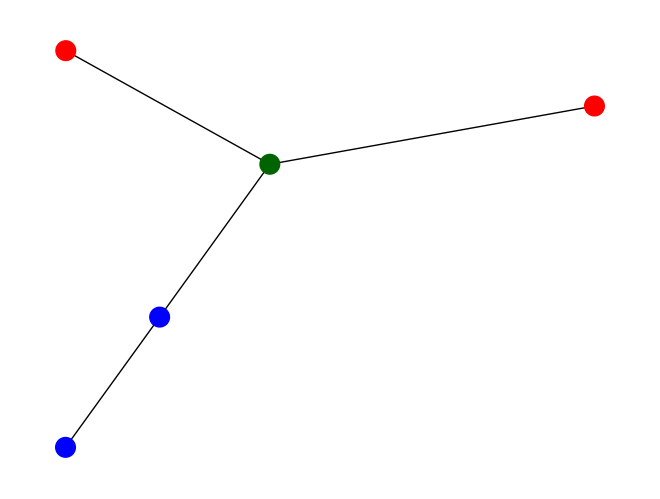

In [13]:
#Largest substructure
H = G10.subgraph(max(list_com, key=len))
plot_graph(H)

Graph of 15 nodes

In [14]:
G15 = nx.read_gexf(path + 'sync600233411_G15.gexf')
node_class_syn = torch.load(path + 'sync600233411_node_class15.pt').detach().numpy()
node_class_syn

array([1, 1, 0, 2, 1, 1, 2, 0, 1, 2, 0, 0, 2, 1, 1])

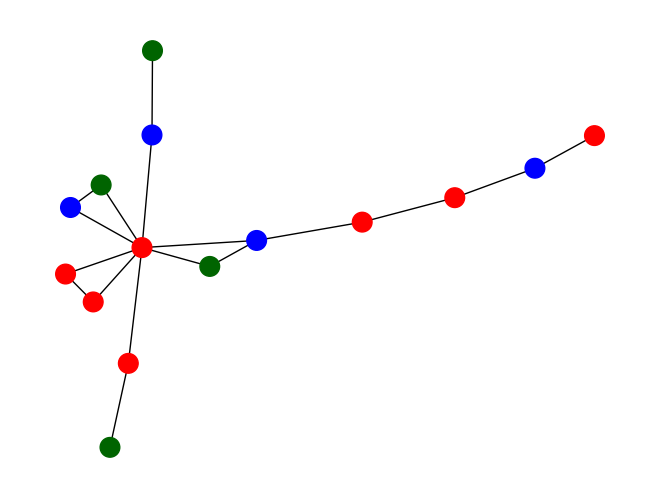

In [18]:
nx.set_node_attributes(G15, dict(zip(G15.nodes(), node_class_syn)), 'class')
plot_graph(G15)

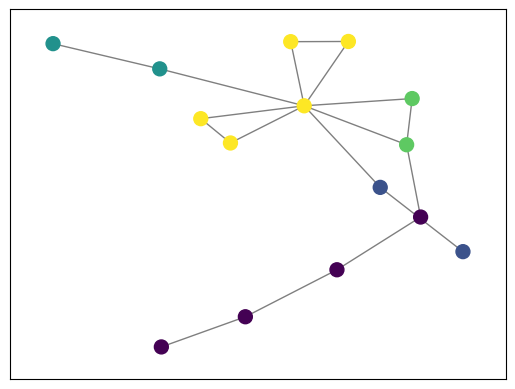

[{'0', '13', '2', '5'},
 {'1', '14'},
 {'3', '7'},
 {'11', '4'},
 {'10', '12', '6', '8', '9'}]

In [16]:
detect_community(G15)
list_com= nx.community.louvain_communities(G15, seed=123)
list_com

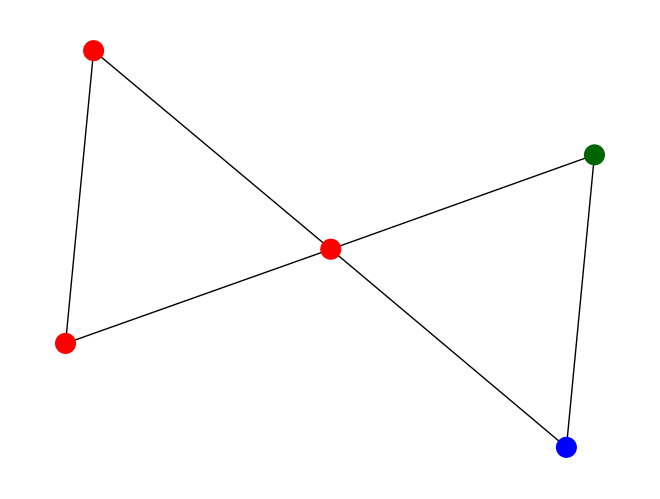

In [17]:
#Largest substructure
H = G15.subgraph(max(list_com, key=len))
plot_graph(H)